# LIMPIEZA
---

In [4]:
import pandas as pd
import numpy as np
from datetime import date, datetime

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("datos/01-bikes.csv", index_col= 0)

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


###  Descripción Columnas:

- *instant*: record index
- *dteday* : date
- *season* : season (spring, summer, autumn, winter)
- *yr* : year (0: 2018, 1:2019)
- *mnth* : month ( 1 to 12)
- *holiday* : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- *weekday* : day of the week
- *workingday* : if day is neither weekend nor holiday is 1, otherwise is 0.
+ *weathersit* : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- *temp* : temperature in Celsius
- *atemp*: feeling temperature in Celsius
- *hum*: humidity
- *windspeed*: wind speed
- *casual*: count of casual users
- *registered*: count of registered users
- *cnt*: count of total rental bikes including both casual and registered

### **EDA BÁSICO**

Nulos, duplicados, info, describe...

In [5]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
df.info() # Podríamos cambiar el tipo de dato de dteday. Y cambiaremos algunos a category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(2)
memory usage: 97.0+ KB


In [7]:
df[["yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]] = df[["yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]].astype("category")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    object  
 3   yr          730 non-null    category
 4   mnth        730 non-null    category
 5   holiday     730 non-null    category
 6   weekday     730 non-null    category
 7   workingday  730 non-null    category
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(6), float64(4), int64(4), object(2)
memory usage: 68.2+ KB


In [9]:
df.isnull().sum() # no tenemos nulos

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
casual,730.0,849.249315,686.479875,2.000000,316.250000,717.000000,1096.500000,3410.000000
registered,730.0,3658.757534,1559.758728,20.000000,2502.250000,3664.500000,4783.250000,6946.000000
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


In [12]:
df.describe(include= ["object", "category"]).T

,count,unique,top,freq
dteday,730,730,01-01-2018,1
season,730,4,autumn,188
yr,730,2,0,365
mnth,730,12,1,62
holiday,730,2,0,709
weekday,730,7,0,105
workingday,730,2,1,499
weathersit,730,3,1,463


### **CORRECIÓN COLUMNAS**
Comprobamos que los datos de algunas columnas no son correctos. Procedemos a corregirlos

**COLUMNA HOLIDAY**

*Festivos:*
- 01-01 New Years Day January  1 
- 16-01 Martin Luther King’s Birthday January 16 
- 13-02 Lincolns Birthday February 
- 20-02 President’s Day February 20
- 31-03 Cesar Chavez’ Birthday March 31
- 29-05 Memorial Day May 29
- 04-07 Independence Day July 4
- 05-07 Bloody Thursday July 5
- 28-07 Harry Bridges’ Birthday July 28
- 04-09 Labor Day September 4
- 10-11 Veterans’ Day November 10
- 23-11 Thanksgiving Day November 23
- 24-11 Day After Thanksgiving November 24
- 24-12 Christmas Eve December 24
- 25-12 Christmas Day December 25
- 31-12 New Year’s Eve December 31

In [13]:
# Creamos una lista con los días festivos
lista_holiday = ["01-01-2018", "16-01-2018", "20-02-2018", "31-03-2018", 
                "29-05-2018", "04-07-2018", "05-07-2018", "28-07-2018", 
                "04-09-2018", "10-11-2018", "23-11-2018", "24-11-2018", 
                "24-12-2018", "25-12-2018", "31-12-2018", "01-01-2019", 
                "16-01-2019", "20-02-2019", "31-03-2019", "29-05-2019", 
                "04-07-2019", "05-07-2019", "28-07-2019", "04-09-2019", 
                "10-11-2019", "28-11-2019", "29-11-2019", "24-12-2019", 
                "25-12-2019", "31-12-2019"]

In [14]:

def holiday(col):
    if col in lista_holiday:
        hol = 1
    else:
        hol = 0
    return hol
df["holiday"] = df["dteday"].apply(holiday)

In [15]:
df.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


***DATETIME***
- Columna **DTEDAY** a datetime
- Función para la columna **season**

In [16]:
 # Cambiamos la columna dteday a datetime
df.dteday = pd.to_datetime(df.dteday)

In [17]:
df["season"].unique()

array(['spring', 'summer', 'autumn', 'winter'], dtype=object)

In [18]:
# Como las estaciones no coinciden con la fecha, creamos una función para ponerlo bien
def season_of_date(col):
    year= col.year
    seasons = {'spring': pd.date_range(start= '21-03-' + str(year), end= '20-06-' + str(year) ),
               'summer': pd.date_range(start= '21-06-' + str(year), end= '22-09-' + str(year) ),
               'autumn': pd.date_range(start= '23-09-' + str(year), end= '20-12-' + str(year))}
    if col in seasons['spring']:
        return 'spring'
    if col in seasons['summer']:
        return 'summer'
    if col in seasons['autumn']:
        return 'autumn'
    else:
        return 'winter'

In [19]:
# Pasamos la funcion
df["season"] = df["dteday"].apply(season_of_date)

In [20]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,winter,0,1,1,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,winter,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,winter,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


*Weekday* y *mnth*

- Columna **weekday**, la eliminamos y creamos una nueva con dt.dayofweek
- Columna **mnth**, la sobreescribimos con dt.month

In [21]:
df["weekday"] = df["dteday"].dt.dayofweek 

In [22]:
# Le sumamos uno para que vayan del 1 al 7, de lunes a domingo
df["weekday"] = df["weekday"] + 1

In [23]:
df["mnth"] = df["dteday"].dt.month

*Workingday*

- Columna **workingday**. Función para cambiar los valores

In [24]:
def workingday(col1, col2):
    # Le pasamos las columnas holiday y weekday
    if col1 == 1 or col2 == 6 or col2 == 7: 
        # Si holiday es 1 (vacaciones) y weekday es 6 o 7 (sábado o domingo) --> 0
        return 0
    else:
        # Para los demás días --> 1
        return 1

- **0: Festivo o fin de semana (no se trabaja).**
- **1: Se trabaja.**

In [25]:
df["workingday"] = df.apply(lambda col: workingday(col["holiday"], col["weekday"]), axis = 1)

***
## **OUTLIERS**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    category      
 4   mnth        730 non-null    int64         
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    int64         
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    category      
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: category(2), datetime64

In [27]:
# Eliminamos la columna "instant" ya que no nos aporta información relevante
df.drop("instant", axis= 1, inplace= True)

In [28]:
# Volvemos a cambiar el tipo a las columnas a category
df[["mnth", "holiday", "weekday", "workingday"]] = df[["mnth", "holiday", "weekday", "workingday"]].astype("category")

In [29]:
num = df.select_dtypes(include= np.number)

In [30]:
num.head(2)

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331,654,985
1,14.902598,17.68695,69.6087,16.652113,131,670,801


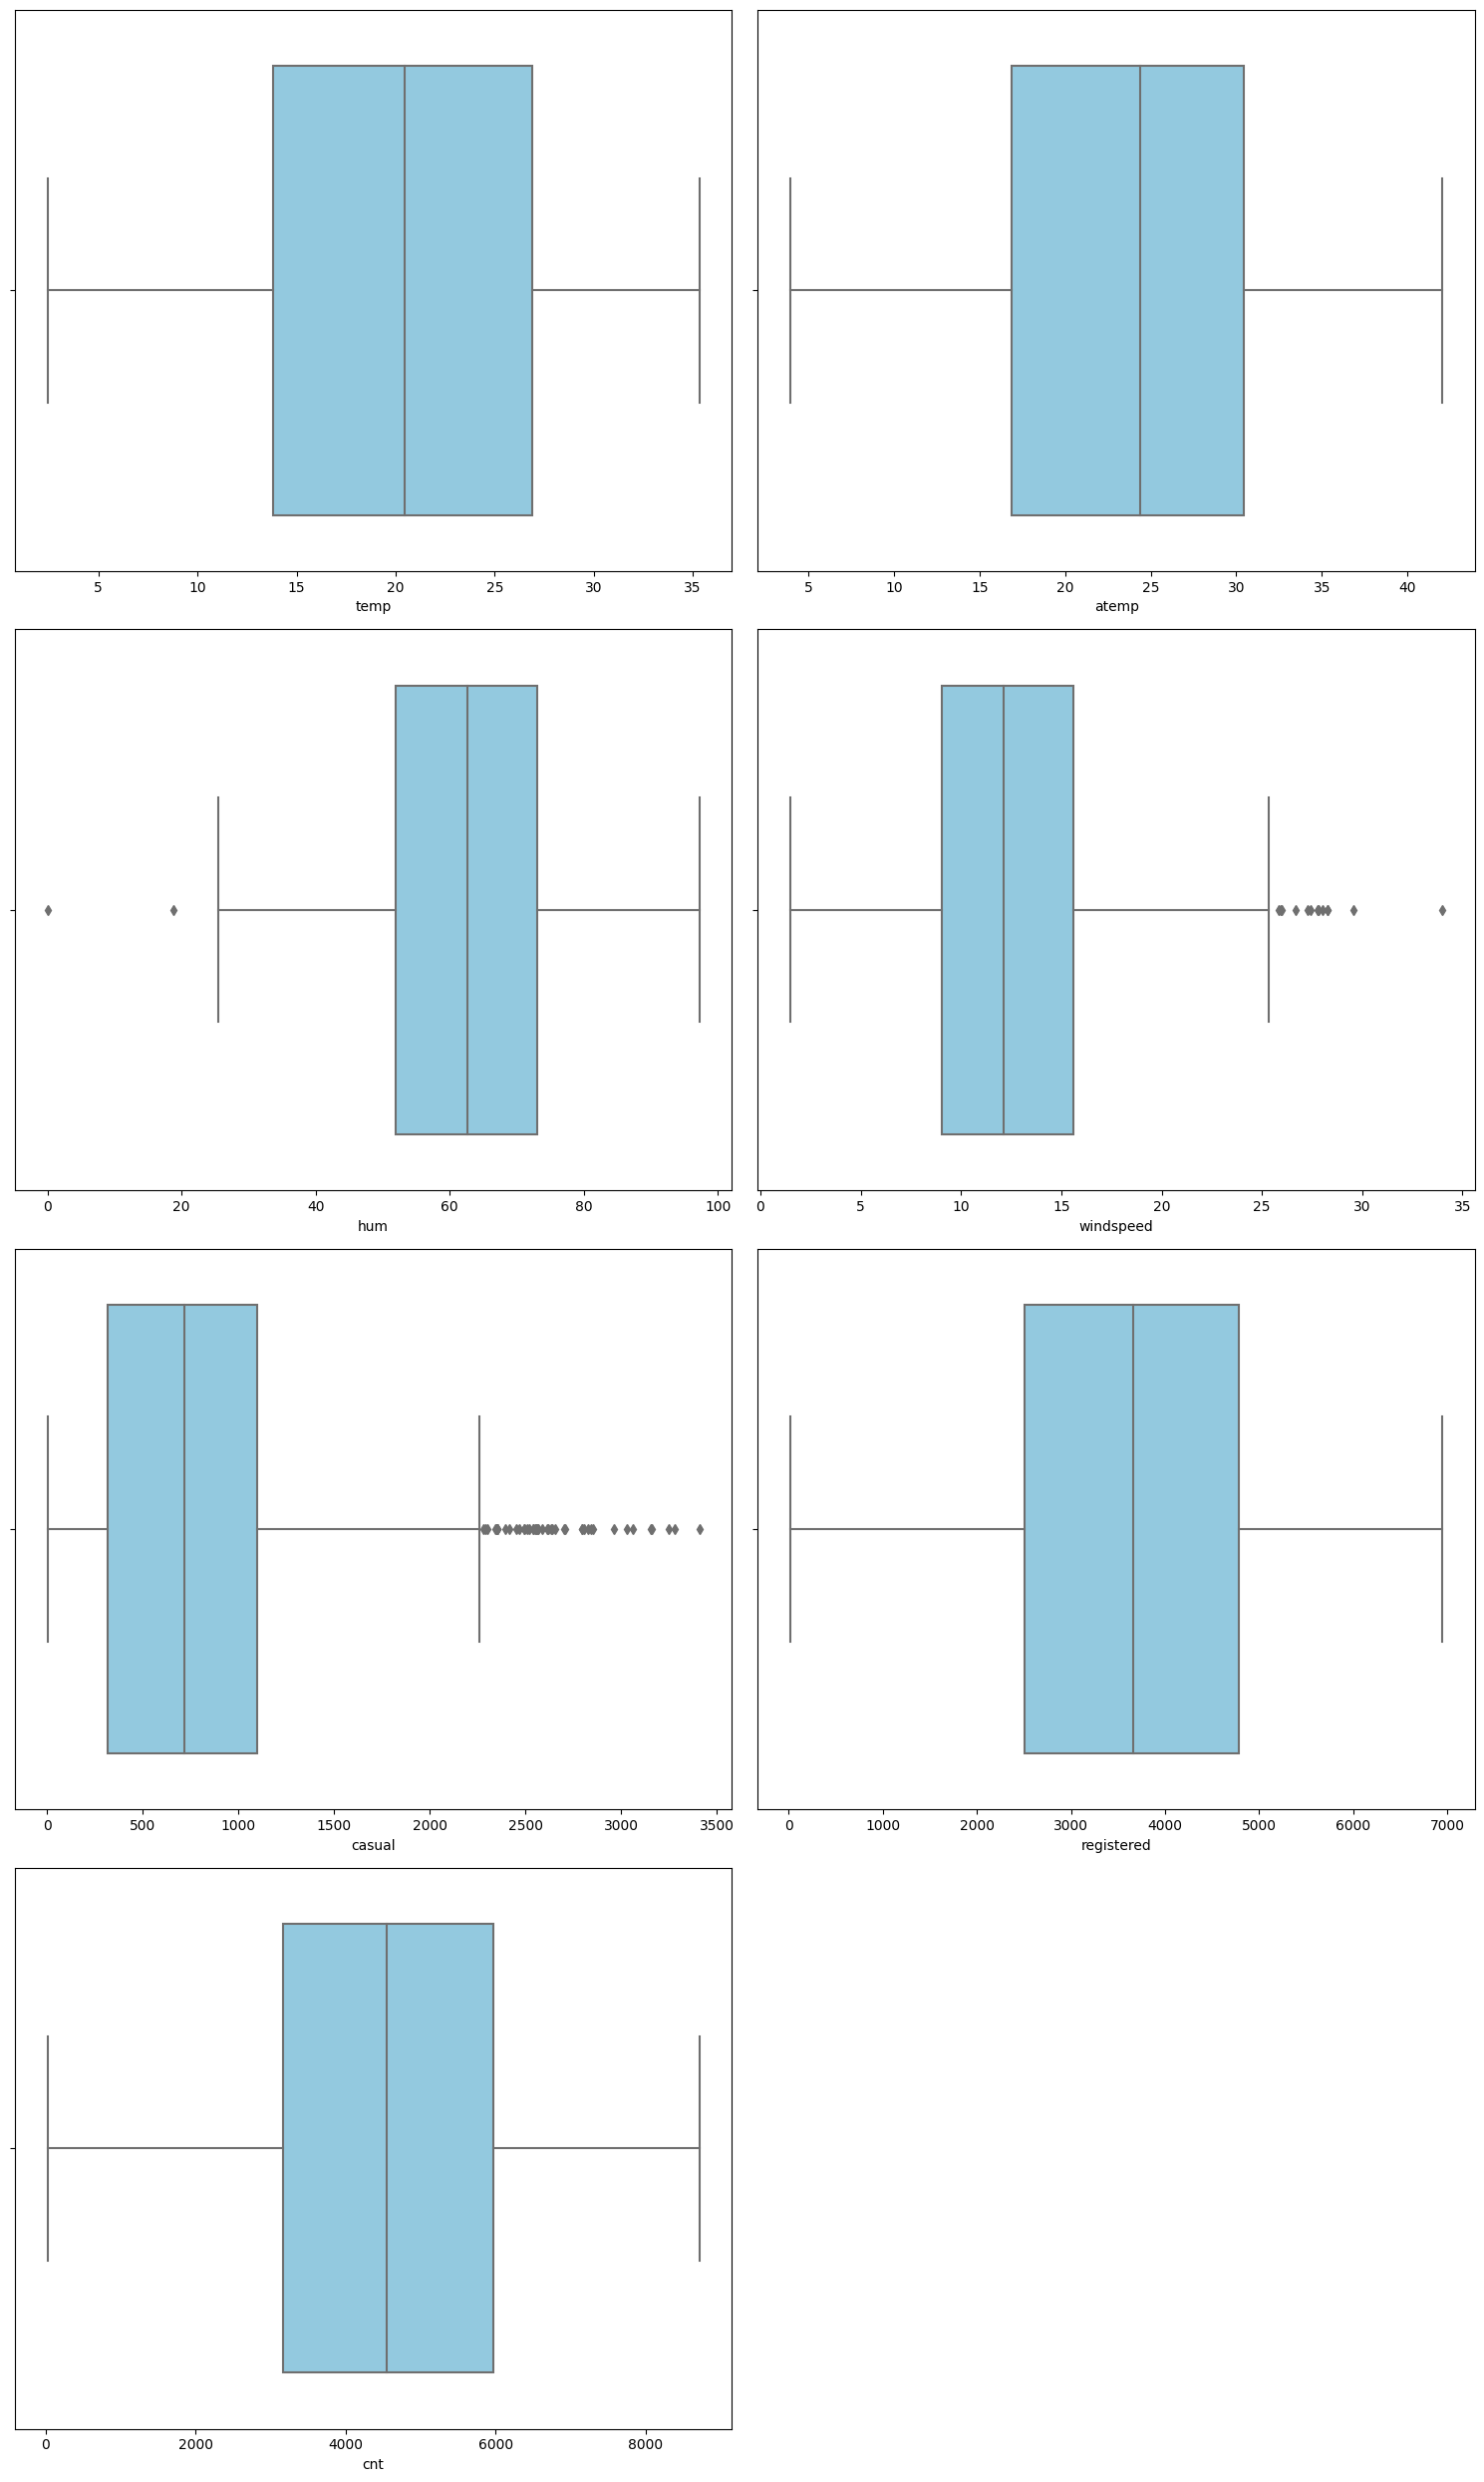

In [31]:
fig, axes = plt.subplots(4, 2, figsize=(15,25))
axes = axes.flat

for i, col in enumerate(num.columns):
    sns.boxplot(x = df[col], data = df, ax=axes[i], color = "skyblue")
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show();

In [32]:
# Función para detectar los outliers
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} 

   
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(dataframe[col], 25)
        Q3 = np.nanpercentile(dataframe[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        
    return dicc_indices

In [33]:
index_price = detectar_outliers(["hum", "windspeed"], df)

In [34]:
df = df.drop(["cnt", "dteday", "casual"], axis= 1)

In [35]:
df.to_csv("datos/03-bikes_limpio.csv")

In [36]:
# Creamos una copia para quitar los outliers
df2 = df.copy()
df2.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered
0,winter,0,1,1,1,0,2,14.110847,18.18125,80.5833,10.749882,654
1,winter,0,2,0,4,1,2,14.902598,17.68695,69.6087,16.652113,670


In [37]:
lista_hum = index_price["hum"]
lista_windspeed = index_price["windspeed"]
lista_indices = list(set(lista_windspeed+lista_hum))
lista_indices

[449, 382, 292, 420, 68, 44, 431, 432, 49, 720, 407, 665, 93, 94]

In [38]:
df2.drop(lista_indices, axis=0, inplace= True)
df2.shape

(716, 12)

In [39]:
df2.to_csv("datos/02-bikes_sinoutliers.csv")

In [40]:
df3 = df.copy()

In [41]:
# lo que vamos a hacer es iterar por el diccionario que nos devuelve la función
for k, v in index_price.items():
    median = df3[k].median() # calculamos la mediana para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df3.loc[i,k] = median

In [42]:
df3.to_csv("datos/04-bikes_mediana.csv")